In [1]:
import numpy as np
import keras
from keras.models import load_model
import csv
from createdatas2 import gaussian_beam, createdata2
import datetime
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit    # フィッティング用
date = str(datetime.date.today())
NOISE = 80 #学習noise%
print(NOISE)
print(date)

Using TensorFlow backend.


80
2020-11-09


In [2]:
#　テストデータ生成
MAX = 20  #上限%
step = 0.1  #ステップ

file_num = 20 #テストファイル数20
test_num = int(MAX/step +1) #データ数(0%~20% Step: 0.1)
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, 4))
fit_param_y = np.zeros((file_num, 4))
noise = 0

t_101 = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))
x_101 = np.zeros((file_num, test_num, data_size))
y_101 = np.zeros((file_num, test_num, data_size))
n = range(0, file_num)

for k in range(0, test_num):
    noise = noise + step
    createdata2(file_num, noise, data_size, x_101[:,k,:], y_101[:,k,:], t_101[:,k,:], ty[:,k,:], fit_param_x, fit_param_y)

t_101 = t_101.T[1].T
print(x_101.shape)
print(t_101.shape)

経過時間:0.07547616958618164[sec]
平均絶対誤差: 0.000420 ± 0.000306
経過時間:0.09393095970153809[sec]
平均絶対誤差: 0.000737 ± 0.000455
経過時間:0.1916980743408203[sec]
平均絶対誤差: 0.001243 ± 0.000707
経過時間:0.11925411224365234[sec]
平均絶対誤差: 0.001615 ± 0.001035
経過時間:0.20328497886657715[sec]
平均絶対誤差: 0.001586 ± 0.001180
経過時間:0.04478311538696289[sec]
平均絶対誤差: 0.002546 ± 0.002164
経過時間:0.06135416030883789[sec]
平均絶対誤差: 0.002937 ± 0.002234
経過時間:0.04117608070373535[sec]
平均絶対誤差: 0.003187 ± 0.002350
経過時間:0.09235405921936035[sec]
平均絶対誤差: 0.004074 ± 0.003376
経過時間:0.051406145095825195[sec]
平均絶対誤差: 0.004219 ± 0.002585
経過時間:0.062355995178222656[sec]
平均絶対誤差: 0.004511 ± 0.003078
経過時間:0.05884909629821777[sec]
平均絶対誤差: 0.005144 ± 0.001885
経過時間:0.07375526428222656[sec]
平均絶対誤差: 0.004281 ± 0.003378
経過時間:0.04989814758300781[sec]
平均絶対誤差: 0.006562 ± 0.003605
経過時間:0.05492091178894043[sec]
平均絶対誤差: 0.005542 ± 0.003805
経過時間:0.05067110061645508[sec]
平均絶対誤差: 0.007362 ± 0.004598
経過時間:0.07366609573364258[sec]
平均絶対誤差: 0.007475 ± 0.005853
経過時間:0.055590

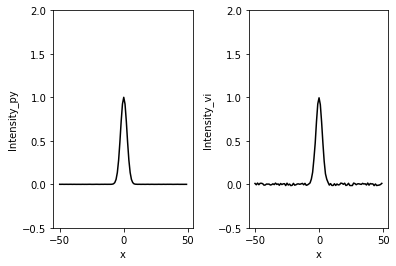

In [4]:
#表示
x_array = np.arange(-50, 50, 1.0)   
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.subplot(1,2,1)
plt.plot(x_array, x_101[0][0],  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_py')
plt.ylim(-0.5, 2.0)      # y軸の表示範囲
plt.subplot(1,2,2)
plt.plot(x_array, x_101[0][30],  color="black", label = 'x0 = 0.0')
plt.xlabel('x')          # 軸ラベル
plt.ylabel('Intensity_vi')
plt.ylim(-0.5, 2.0)
plt.show()
plt.close()

In [4]:
#学習パラメータの取得
NOISE = 30
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn1.h5"
model = load_model(save_model_path)

In [4]:
#学習パラメータの取得
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201030/2020-10-30-10%cnn1.h5"
model = load_model(save_model_path)

In [5]:
#学習パラメータの取得
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201105/2020-11-05-30%cnn1.h5"
model = load_model(save_model_path)

In [3]:
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201109/2020-11-09-10%cnn1.h5"
model = load_model(save_model_path)

In [10]:
save_model_path = "/Users/nagaiyuma/Desktop/parameters/201109/2020-11-09-80%cnn1.h5"
model = load_model(save_model_path)

In [11]:
ave_101 = np.zeros(test_num)
std_101 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))
pred_x = np.zeros((file_num ,test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])
    
print(pred_x.shape)
ave_101 = np.average(error, axis=0)
std_101 = np.std(error, axis=0)

(20, 201)


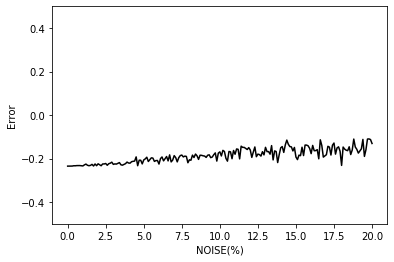

0.0%:-0.2347865045070648±0.0009057200994033278
1.0%:-0.2338875114917755±0.008529268492285445
2.0%:-0.22413097620010375±0.016432461366638475
3.0%:-0.22665210962295532±0.027702631405979873
4.0%:-0.22048203647136688±0.02622191412627597
5.0%:-0.2063169002532959±0.025889228065726733
6.0%:-0.22526972591876984±0.0442841144523044
7.0%:-0.18654918372631074±0.041324551550644344
8.0%:-0.2056829333305359±0.0588596530788627
9.0%:-0.18848251104354857±0.0792974721401432
10.0%:-0.169144806265831±0.07156195123728952
11.0%:-0.18015569150447847±0.08332795535877724
12.0%:-0.16074169278144837±0.08125693022273929
13.0%:-0.14832246601581572±0.09097956865542553
14.0%:-0.1504746437072754±0.09988225442553768
15.0%:-0.19285983145236968±0.07935780725573857
16.0%:-0.1773257941007614±0.07960148847962899
17.0%:-0.1822529286146164±0.10680859097828914
18.0%:-0.23146691024303437±0.09482679708389549
19.0%:-0.15744712054729462±0.1053399194978684
20.0%:-0.13067319989204407±0.08274122968195771


In [12]:
#結果の表示
x = np.arange(0, 20.1,0.1)
plt.plot(x, ave_101,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-0.5, 0.5)
plt.show()
plt.close()

for i in range(0,test_num,10):
    print_ave = str(x[i]) + "%:" + str(ave_101[i])+ "±" + str(std_101[i])
    print(print_ave)

In [13]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise%d-%dpy.csv" %(NOISE, MAX)
save_data = np.zeros((3, test_num))
save_data[0] = x
save_data[1] = ave_101
save_data[2] = std_101
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

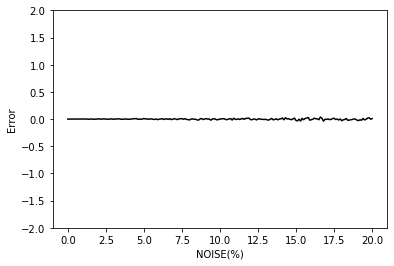

0.0%:-3.0112150499407044e-05±0.0005191328890492848
1.0%:4.763994713339772e-05±0.005460874201810276
2.0%:0.004188216065993729±0.007694804621743384
3.0%:-0.004895229543335054±0.01583200131142928
4.0%:-0.002035348399861205±0.014748557338654265
5.0%:0.00989418752789618±0.025441692460571534
6.0%:-0.002789807884606704±0.032987370459522054
7.0%:0.006357207118287858±0.021558057965621723
8.0%:-0.015651683797813915±0.03388173691750219
9.0%:0.002351505515582887±0.05510215274332489
10.0%:0.0020889865588588344±0.03654633892388848
11.0%:-0.003602483480560883±0.04627998081878137
12.0%:-0.009124163812332848±0.046504564112970055
13.0%:-0.004254886843239866±0.07368039859561655
14.0%:0.003971587746912979±0.06234333508746455
15.0%:-0.02815071749174559±0.06134882835766336
16.0%:-0.010875725437757592±0.08549857479794194
17.0%:-0.006032405526870699±0.06995043694582988
18.0%:-0.030603875302713447±0.07788023827272361
19.0%:-0.018851818821323973±0.08281665042273981
20.0%:0.00875818891754418±0.09096228601432459


In [14]:
# ガウシアンビームのパラメータ
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
param_ini_x = np.array([i0, x0, w0, h0])  # フィッティングの初期値 (ここではデータから推定は行わない)
x_array = np.arange(-center, center, 1.0)
fit_param_x = np.zeros((test_num, 4))
error = np.zeros((file_num, test_num))

t_fit = t_101 - 1 #x = 0の補正
for i in range(file_num):
    for k in range(test_num):
        profile_x = x_101[i][k]
        param, cov  = curve_fit(gaussian_beam, x_array, profile_x, p0=param_ini_x, maxfev=2000)
        fit_param_x[n][0] = param[0]
        fit_param_x[n][1] = param[1]
        fit_param_x[n][2] = param[2]
        fit_param_x[n][3] = param[3]
        
        error[i][k] = param[1]-t_fit[i][k]
    
ave_fit = np.average(error, axis=0)
std_fit= np.std(error, axis=0)

#結果の表示
plt.plot(x, ave_fit,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,test_num,10):
    print_ave = str(x[i]) + "%:" + str(ave_fit[i])+ "±" + str(std_fit[i])
    print(print_ave)

In [15]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"-%d_fitpy.csv" %(MAX)
x_line = n
save_data = np.zeros((3, test_num))
save_data[0] = x
save_data[1] = ave_fit
save_data[2] = std_fit
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)

In [9]:
#学習パラメータの取得
pred_x = np.zeros((file_num ,test_num))
save_model_path = "/Users/nagaiyuma/Desktop/parameters/noise"+str(NOISE)+"-cnn3.h5"
model = load_model(save_model_path)

In [10]:
ave_101_3 = np.zeros(test_num)
std_101_3 = np.zeros(test_num)
error = np.zeros((file_num, test_num))
abs_error = np.zeros((file_num, test_num))

for k in n:
    xtest = x_101[k].reshape(-1, 100, 1)
    pred_x[k] = model.predict(xtest).T[1].flatten()
    error[k] = pred_x[k] - t_101[k]
    abs_error[k] = abs(pred_x[k] - t_101[k])

ave_101_3 = np.average(error, axis=0)
std_101_3 = np.std(error, axis=0)

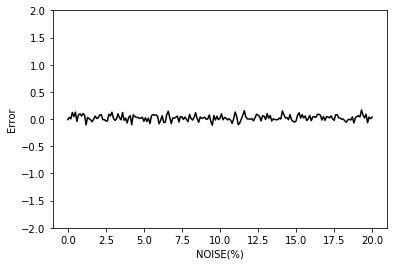

0.0%:0.033868294060219385±0.2974455268911421
1.0%:0.12469524502753124±0.37360121005762853
2.0%:0.04581560850142345±0.3427828350947502
3.0%:0.049703634381283376±0.3478745358527807
4.0%:0.11259480476378307±0.3123020288819961
5.0%:0.03354438900946484±0.3922866923477848
6.0%:0.06959678292273389±0.3809136495183625
7.0%:0.10351740777491436±0.2849158543955207
8.0%:0.09874217420815334±0.32814998619186564
9.0%:0.08606243044136867±0.37906768651654343
10.0%:0.0851808509230505±0.2887278154194058
11.0%:0.10812710583208904±0.36832250779996684
12.0%:0.05182632863520489±0.33060885929087724
13.0%:0.0964639908075224±0.32189040490578097
14.0%:0.04373972177504406±0.3429821398744896
15.0%:0.03425450235604153±0.39740486039616735
16.0%:0.07126826554535733±0.4162243460704411
17.0%:0.05547135233878002±0.41244665482083875
18.0%:0.09468903899191723±0.29643877104540145
19.0%:0.09622896373270855±0.3925731164172176
20.0%:0.1262417694926153±0.3355728962456684


In [11]:
#結果の表示
plt.plot(x, ave_101,  color="black")
plt.xlabel('NOISE(%)')          # 軸ラベル
plt.ylabel('Error')
plt.ylim(-2.0, 2.0)
plt.show()
plt.close()

for i in range(0,test_num,10):
    print_ave = str(x[i]) + "%:" + str(ave_101_3[i])+ "±" + str(std_101_3[i])
    print(print_ave)

In [13]:
#結果の保存
save_predict = "/Users/nagaiyuma/Desktop/maindata/"+date+"noise%d_%d_3py.csv" %(NOISE, MAX)
save_data = np.zeros((3, test_num))
save_data[0] = x
save_data[1] = ave_101_3
save_data[2] = std_101_3
save_data = save_data.T

with open(save_predict,'w') as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(save_data)